In [5]:
#some k-fold code adapted from:
#https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-keras.md

import numpy as np
import os
from tensorflow import keras
from tensorflow.keras import layers

notebook_path = 'path\\to\\where\\inputfiles\\are'

num_classes = 4
input_shape = (11, 20, 1)
batch_size = 32
epochs = 1000

trainin = open(notebook_path+'2d_trainin.txt', 'r') #not appended with bias value
trainout = open(notebook_path+'all_trainout.txt', 'r')
testin = open(notebook_path+'2d_testin.txt', 'r')
testout = open(notebook_path+'all_testout.txt', 'r')

trainin_matrix = np.zeros((0, 11, 20, 1))
trainout_matrix = np.zeros((0, num_classes))
testin_matrix = np.zeros((0, 11, 20, 1))
testout_matrix = np.zeros((0, num_classes))

while True:
    inline = trainin.readline()
    outline = trainout.readline()
    if not inline or inline == '':
        break
    in_num = [float(numeric_string) for numeric_string in inline.split()]
    this_matrix = np.zeros((0, 20, 1))
    arr_i = 0
    for j in range(11):
        this_row = np.zeros((20, 1))
        for i in range(20):
            this_row[i] = float(in_num[arr_i])
        this_matrix = np.append(this_matrix,[this_row], axis=0)
        arr_i += 1
    trainin_matrix = np.append(trainin_matrix,[this_matrix], axis=0)
    out_num = [float(numeric_string) for numeric_string in outline.split()]
    trainout_matrix = np.append(trainout_matrix,[out_num], axis=0)

while True:
    inline = testin.readline()
    outline = testout.readline()
    if not inline or inline == '':
        break
    in_num = [float(numeric_string) for numeric_string in inline.split()]
    this_matrix = np.zeros((0, 20, 1))
    arr_i = 0
    for j in range(11):
        this_row = np.zeros((20, 1))
        for i in range(20):
            this_row[i] = float(in_num[arr_i])
        this_matrix = np.append(this_matrix,[this_row], axis=0)
        arr_i += 1
    testin_matrix = np.append(testin_matrix,[this_matrix], axis=0)
    out_num = [float(numeric_string) for numeric_string in outline.split()]
    testout_matrix = np.append(testout_matrix,[out_num], axis=0)

print(trainin_matrix.shape)
print(trainout_matrix.shape)
print(testin_matrix.shape)
print(testout_matrix.shape)    
    
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(trainin_matrix, trainout_matrix, batch_size=batch_size, epochs=epochs, validation_split=0.1)
          
score = model.evaluate(testin_matrix, testout_matrix, verbose=0)

print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 9, 18, 32)         320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 9, 32)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 2, 7, 64)          18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 3, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 192)               0         
                                                                 
 dropout_1 (Dropout)         (None, 192)              

Epoch 47/1000
66/66 [==============================] - 0s 4ms/step - loss: 710.6605 - accuracy: 0.2601 - val_loss: 1323.4628 - val_accuracy: 0.0255
Epoch 48/1000
66/66 [==============================] - 0s 4ms/step - loss: 665.2350 - accuracy: 0.2402 - val_loss: 305.9479 - val_accuracy: 0.3234
Epoch 49/1000
66/66 [==============================] - 0s 4ms/step - loss: 875.1475 - accuracy: 0.2686 - val_loss: 379.0255 - val_accuracy: 0.3234
Epoch 50/1000
66/66 [==============================] - 0s 4ms/step - loss: 795.2542 - accuracy: 0.2492 - val_loss: 655.0213 - val_accuracy: 0.0255
Epoch 51/1000
66/66 [==============================] - 0s 4ms/step - loss: 864.0733 - accuracy: 0.2534 - val_loss: 103.7615 - val_accuracy: 0.4340
Epoch 52/1000
66/66 [==============================] - 0s 4ms/step - loss: 735.3638 - accuracy: 0.2691 - val_loss: 346.6245 - val_accuracy: 0.3234
Epoch 53/1000
66/66 [==============================] - 0s 4ms/step - loss: 805.7858 - accuracy: 0.2639 - val_loss: 10

Epoch 157/1000
66/66 [==============================] - 0s 4ms/step - loss: 4545.7461 - accuracy: 0.2800 - val_loss: 1717.9574 - val_accuracy: 0.2170
Epoch 158/1000
66/66 [==============================] - 0s 4ms/step - loss: 4559.3721 - accuracy: 0.2558 - val_loss: 4211.3193 - val_accuracy: 0.0255
Epoch 159/1000
66/66 [==============================] - 0s 4ms/step - loss: 4517.5479 - accuracy: 0.2729 - val_loss: 1191.0468 - val_accuracy: 0.4340
Epoch 160/1000
66/66 [==============================] - 0s 4ms/step - loss: 4472.9097 - accuracy: 0.2705 - val_loss: 2409.9404 - val_accuracy: 0.0255
Epoch 161/1000
66/66 [==============================] - 0s 4ms/step - loss: 4849.3379 - accuracy: 0.2534 - val_loss: 2287.2681 - val_accuracy: 0.3234
Epoch 162/1000
66/66 [==============================] - 0s 4ms/step - loss: 4104.6274 - accuracy: 0.2473 - val_loss: 3433.2085 - val_accuracy: 0.0255
Epoch 163/1000
66/66 [==============================] - 0s 4ms/step - loss: 4028.9939 - accuracy: 0.

66/66 [==============================] - 0s 3ms/step - loss: 8596.5518 - accuracy: 0.2639 - val_loss: 4349.0044 - val_accuracy: 0.0255
Epoch 266/1000
66/66 [==============================] - 0s 4ms/step - loss: 10683.0996 - accuracy: 0.2648 - val_loss: 14644.9697 - val_accuracy: 0.0255
Epoch 267/1000
66/66 [==============================] - 0s 3ms/step - loss: 11895.3428 - accuracy: 0.2582 - val_loss: 14272.2725 - val_accuracy: 0.0255
Epoch 268/1000
66/66 [==============================] - 0s 3ms/step - loss: 9449.2227 - accuracy: 0.2601 - val_loss: 4424.7832 - val_accuracy: 0.0255
Epoch 269/1000
66/66 [==============================] - 0s 3ms/step - loss: 10302.8428 - accuracy: 0.2653 - val_loss: 9205.0381 - val_accuracy: 0.2170
Epoch 270/1000
66/66 [==============================] - 0s 3ms/step - loss: 10823.0479 - accuracy: 0.2719 - val_loss: 5428.5615 - val_accuracy: 0.2170
Epoch 271/1000
66/66 [==============================] - 0s 4ms/step - loss: 9359.8818 - accuracy: 0.2629 - va

66/66 [==============================] - 0s 4ms/step - loss: 19168.1133 - accuracy: 0.2553 - val_loss: 8866.7236 - val_accuracy: 0.3234
Epoch 374/1000
66/66 [==============================] - 0s 4ms/step - loss: 19912.4453 - accuracy: 0.2686 - val_loss: 13470.6387 - val_accuracy: 0.4340
Epoch 375/1000
66/66 [==============================] - 0s 4ms/step - loss: 17965.5762 - accuracy: 0.2790 - val_loss: 35200.1367 - val_accuracy: 0.0255
Epoch 376/1000
66/66 [==============================] - 0s 4ms/step - loss: 17421.4531 - accuracy: 0.2752 - val_loss: 4472.2383 - val_accuracy: 0.0255
Epoch 377/1000
66/66 [==============================] - 0s 4ms/step - loss: 17004.5996 - accuracy: 0.2643 - val_loss: 35648.5430 - val_accuracy: 0.0255
Epoch 378/1000
66/66 [==============================] - 0s 4ms/step - loss: 20449.8398 - accuracy: 0.2653 - val_loss: 12342.4678 - val_accuracy: 0.2170
Epoch 379/1000
66/66 [==============================] - 0s 4ms/step - loss: 18711.6191 - accuracy: 0.2487

66/66 [==============================] - 0s 4ms/step - loss: 19944.2949 - accuracy: 0.2601 - val_loss: 20157.6230 - val_accuracy: 0.4383
Epoch 428/1000
66/66 [==============================] - 0s 3ms/step - loss: 24045.7656 - accuracy: 0.2482 - val_loss: 41477.1758 - val_accuracy: 0.0255
Epoch 429/1000
66/66 [==============================] - 0s 4ms/step - loss: 22485.8281 - accuracy: 0.2610 - val_loss: 23663.3867 - val_accuracy: 0.0255
Epoch 430/1000
66/66 [==============================] - 0s 4ms/step - loss: 24472.9102 - accuracy: 0.2833 - val_loss: 11612.3232 - val_accuracy: 0.3234
Epoch 431/1000
66/66 [==============================] - 0s 4ms/step - loss: 22372.8223 - accuracy: 0.2487 - val_loss: 34402.5859 - val_accuracy: 0.0255
Epoch 432/1000
66/66 [==============================] - 0s 4ms/step - loss: 20807.6543 - accuracy: 0.2568 - val_loss: 15239.8975 - val_accuracy: 0.0255
Epoch 433/1000
66/66 [==============================] - 0s 3ms/step - loss: 17325.6895 - accuracy: 0.26

66/66 [==============================] - 0s 4ms/step - loss: 33788.7578 - accuracy: 0.2539 - val_loss: 40644.3594 - val_accuracy: 0.0255
Epoch 482/1000
66/66 [==============================] - 0s 4ms/step - loss: 30910.6348 - accuracy: 0.2444 - val_loss: 16940.1191 - val_accuracy: 0.2170
Epoch 483/1000
66/66 [==============================] - 0s 4ms/step - loss: 34555.8477 - accuracy: 0.2658 - val_loss: 39513.0547 - val_accuracy: 0.4340
Epoch 484/1000
66/66 [==============================] - 0s 4ms/step - loss: 32461.3086 - accuracy: 0.2634 - val_loss: 23209.1230 - val_accuracy: 0.2170
Epoch 485/1000
66/66 [==============================] - 0s 3ms/step - loss: 25551.1445 - accuracy: 0.2804 - val_loss: 7933.5488 - val_accuracy: 0.3234
Epoch 486/1000
66/66 [==============================] - 0s 4ms/step - loss: 24960.6074 - accuracy: 0.2591 - val_loss: 13807.1152 - val_accuracy: 0.3234
Epoch 487/1000
66/66 [==============================] - 0s 3ms/step - loss: 26209.8223 - accuracy: 0.248

66/66 [==============================] - 0s 3ms/step - loss: 36836.6523 - accuracy: 0.2577 - val_loss: 38483.0625 - val_accuracy: 0.0255
Epoch 536/1000
66/66 [==============================] - 0s 4ms/step - loss: 30776.9199 - accuracy: 0.2781 - val_loss: 36206.0352 - val_accuracy: 0.0213
Epoch 537/1000
66/66 [==============================] - 0s 4ms/step - loss: 27125.7109 - accuracy: 0.2819 - val_loss: 24057.1914 - val_accuracy: 0.0255
Epoch 538/1000
66/66 [==============================] - 0s 4ms/step - loss: 32870.3828 - accuracy: 0.2553 - val_loss: 27840.0000 - val_accuracy: 0.4340
Epoch 539/1000
66/66 [==============================] - 0s 4ms/step - loss: 31637.6914 - accuracy: 0.2563 - val_loss: 44174.9805 - val_accuracy: 0.0255
Epoch 540/1000
66/66 [==============================] - 0s 4ms/step - loss: 28524.6875 - accuracy: 0.2477 - val_loss: 48683.8477 - val_accuracy: 0.0255
Epoch 541/1000
66/66 [==============================] - 0s 4ms/step - loss: 33188.2305 - accuracy: 0.26

66/66 [==============================] - 0s 4ms/step - loss: 44019.2969 - accuracy: 0.2534 - val_loss: 8302.5703 - val_accuracy: 0.3234
Epoch 590/1000
66/66 [==============================] - 0s 4ms/step - loss: 41657.4258 - accuracy: 0.2752 - val_loss: 64512.5430 - val_accuracy: 0.2170
Epoch 591/1000
66/66 [==============================] - 0s 4ms/step - loss: 38007.5117 - accuracy: 0.2724 - val_loss: 63467.8477 - val_accuracy: 0.0255
Epoch 592/1000
66/66 [==============================] - 0s 3ms/step - loss: 33171.6836 - accuracy: 0.2515 - val_loss: 7318.3320 - val_accuracy: 0.3234
Epoch 593/1000
66/66 [==============================] - 0s 4ms/step - loss: 38844.8828 - accuracy: 0.2449 - val_loss: 54476.8672 - val_accuracy: 0.0340
Epoch 594/1000
66/66 [==============================] - 0s 4ms/step - loss: 45962.2773 - accuracy: 0.2639 - val_loss: 51854.7070 - val_accuracy: 0.2170
Epoch 595/1000
66/66 [==============================] - 0s 3ms/step - loss: 48471.3438 - accuracy: 0.2387

66/66 [==============================] - 0s 4ms/step - loss: 38197.0859 - accuracy: 0.2586 - val_loss: 21371.0977 - val_accuracy: 0.3234
Epoch 644/1000
66/66 [==============================] - 0s 4ms/step - loss: 38184.1992 - accuracy: 0.2610 - val_loss: 24898.9961 - val_accuracy: 0.3234
Epoch 645/1000
66/66 [==============================] - 0s 4ms/step - loss: 45130.0078 - accuracy: 0.2653 - val_loss: 35378.1094 - val_accuracy: 0.0255
Epoch 646/1000
66/66 [==============================] - 0s 4ms/step - loss: 44784.4453 - accuracy: 0.2577 - val_loss: 32257.0898 - val_accuracy: 0.0255
Epoch 647/1000
66/66 [==============================] - 0s 4ms/step - loss: 39980.0820 - accuracy: 0.2525 - val_loss: 97236.4219 - val_accuracy: 0.2170
Epoch 648/1000
66/66 [==============================] - 0s 4ms/step - loss: 39822.5234 - accuracy: 0.2719 - val_loss: 16122.5527 - val_accuracy: 0.3234
Epoch 649/1000
66/66 [==============================] - 0s 4ms/step - loss: 39986.0547 - accuracy: 0.26

66/66 [==============================] - 0s 4ms/step - loss: 59198.0312 - accuracy: 0.2700 - val_loss: 80557.2109 - val_accuracy: 0.0255
Epoch 698/1000
66/66 [==============================] - 0s 4ms/step - loss: 40101.9883 - accuracy: 0.2553 - val_loss: 74915.4062 - val_accuracy: 0.0255
Epoch 699/1000
66/66 [==============================] - 0s 4ms/step - loss: 56114.6016 - accuracy: 0.2667 - val_loss: 30696.5879 - val_accuracy: 0.2213
Epoch 700/1000
66/66 [==============================] - 0s 4ms/step - loss: 53328.1641 - accuracy: 0.2563 - val_loss: 49344.2734 - val_accuracy: 0.2170
Epoch 701/1000
66/66 [==============================] - 0s 4ms/step - loss: 49684.4023 - accuracy: 0.2421 - val_loss: 65550.7031 - val_accuracy: 0.0255
Epoch 702/1000
66/66 [==============================] - 0s 4ms/step - loss: 41686.9492 - accuracy: 0.2501 - val_loss: 23277.4805 - val_accuracy: 0.3234
Epoch 703/1000
66/66 [==============================] - 0s 4ms/step - loss: 57839.0820 - accuracy: 0.27

Epoch 751/1000
66/66 [==============================] - 0s 4ms/step - loss: 52811.7930 - accuracy: 0.2596 - val_loss: 17096.4434 - val_accuracy: 0.4340
Epoch 752/1000
66/66 [==============================] - 0s 4ms/step - loss: 54427.1641 - accuracy: 0.2705 - val_loss: 17495.1484 - val_accuracy: 0.0255
Epoch 753/1000
66/66 [==============================] - 0s 4ms/step - loss: 52919.6016 - accuracy: 0.2714 - val_loss: 30958.5703 - val_accuracy: 0.2170
Epoch 754/1000
66/66 [==============================] - 0s 4ms/step - loss: 50776.8320 - accuracy: 0.2785 - val_loss: 44711.7617 - val_accuracy: 0.4340
Epoch 755/1000
66/66 [==============================] - 0s 4ms/step - loss: 56462.2539 - accuracy: 0.2530 - val_loss: 49450.4844 - val_accuracy: 0.0255
Epoch 756/1000
66/66 [==============================] - 0s 4ms/step - loss: 48789.2852 - accuracy: 0.2605 - val_loss: 19111.7617 - val_accuracy: 0.2170
Epoch 757/1000
66/66 [==============================] - 0s 4ms/step - loss: 56366.6289 -

Epoch 805/1000
66/66 [==============================] - 0s 4ms/step - loss: 58543.1758 - accuracy: 0.2605 - val_loss: 199762.7969 - val_accuracy: 0.0255
Epoch 806/1000
66/66 [==============================] - 0s 4ms/step - loss: 86425.6484 - accuracy: 0.2558 - val_loss: 104683.3047 - val_accuracy: 0.0255
Epoch 807/1000
66/66 [==============================] - 0s 4ms/step - loss: 61879.1797 - accuracy: 0.2662 - val_loss: 44472.1016 - val_accuracy: 0.3234
Epoch 808/1000
66/66 [==============================] - 0s 4ms/step - loss: 79589.8047 - accuracy: 0.2610 - val_loss: 39324.8672 - val_accuracy: 0.4340
Epoch 809/1000
66/66 [==============================] - 0s 4ms/step - loss: 106217.2031 - accuracy: 0.2525 - val_loss: 35455.4570 - val_accuracy: 0.4340
Epoch 810/1000
66/66 [==============================] - 0s 4ms/step - loss: 72098.1953 - accuracy: 0.2615 - val_loss: 50704.3398 - val_accuracy: 0.4340
Epoch 811/1000
66/66 [==============================] - 0s 4ms/step - loss: 71641.921

Epoch 859/1000
66/66 [==============================] - 0s 4ms/step - loss: 80317.1797 - accuracy: 0.2477 - val_loss: 60209.0195 - val_accuracy: 0.2170
Epoch 860/1000
66/66 [==============================] - 0s 4ms/step - loss: 68061.0781 - accuracy: 0.2653 - val_loss: 56291.6758 - val_accuracy: 0.4340
Epoch 861/1000
66/66 [==============================] - 0s 3ms/step - loss: 92013.8125 - accuracy: 0.2662 - val_loss: 135730.1094 - val_accuracy: 0.2170
Epoch 862/1000
66/66 [==============================] - 0s 4ms/step - loss: 74115.6953 - accuracy: 0.2601 - val_loss: 71111.3516 - val_accuracy: 0.3234
Epoch 863/1000
66/66 [==============================] - 0s 4ms/step - loss: 69316.2734 - accuracy: 0.2705 - val_loss: 65531.6406 - val_accuracy: 0.0255
Epoch 864/1000
66/66 [==============================] - 0s 4ms/step - loss: 72578.3047 - accuracy: 0.2705 - val_loss: 165609.1250 - val_accuracy: 0.0255
Epoch 865/1000
66/66 [==============================] - 0s 4ms/step - loss: 72860.5000

Epoch 913/1000
66/66 [==============================] - 0s 4ms/step - loss: 71606.9375 - accuracy: 0.2667 - val_loss: 35765.9219 - val_accuracy: 0.0255
Epoch 914/1000
66/66 [==============================] - 0s 4ms/step - loss: 74557.0000 - accuracy: 0.2804 - val_loss: 19601.9746 - val_accuracy: 0.3234
Epoch 915/1000
66/66 [==============================] - 0s 3ms/step - loss: 80219.4375 - accuracy: 0.2639 - val_loss: 65690.6875 - val_accuracy: 0.3234
Epoch 916/1000
66/66 [==============================] - 0s 4ms/step - loss: 87465.5312 - accuracy: 0.2601 - val_loss: 72431.6719 - val_accuracy: 0.0553
Epoch 917/1000
66/66 [==============================] - 0s 4ms/step - loss: 87740.0312 - accuracy: 0.2681 - val_loss: 42807.5586 - val_accuracy: 0.3234
Epoch 918/1000
66/66 [==============================] - 0s 4ms/step - loss: 81385.1406 - accuracy: 0.2544 - val_loss: 32262.5371 - val_accuracy: 0.2170
Epoch 919/1000
66/66 [==============================] - 0s 3ms/step - loss: 68819.8594 -

Epoch 967/1000
66/66 [==============================] - 0s 4ms/step - loss: 99436.0547 - accuracy: 0.2591 - val_loss: 41824.9531 - val_accuracy: 0.2170
Epoch 968/1000
66/66 [==============================] - 0s 3ms/step - loss: 89408.6328 - accuracy: 0.2681 - val_loss: 125786.4141 - val_accuracy: 0.0255
Epoch 969/1000
66/66 [==============================] - 0s 4ms/step - loss: 85807.4141 - accuracy: 0.2496 - val_loss: 94247.2188 - val_accuracy: 0.0255
Epoch 970/1000
66/66 [==============================] - 0s 3ms/step - loss: 86404.4297 - accuracy: 0.2572 - val_loss: 51254.4688 - val_accuracy: 0.3234
Epoch 971/1000
66/66 [==============================] - 0s 4ms/step - loss: 95372.5547 - accuracy: 0.2402 - val_loss: 175990.7344 - val_accuracy: 0.0255
Epoch 972/1000
66/66 [==============================] - 0s 3ms/step - loss: 109204.5547 - accuracy: 0.2534 - val_loss: 168866.3125 - val_accuracy: 0.0255
Epoch 973/1000
66/66 [==============================] - 0s 4ms/step - loss: 91586.15

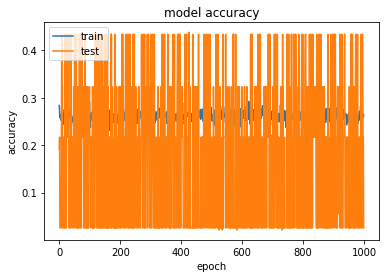

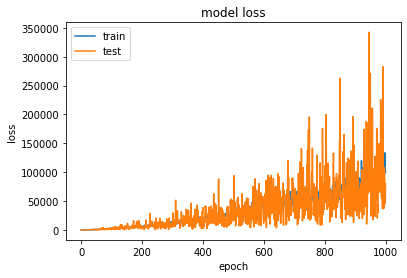

In [6]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
print(np.mean(history.history['accuracy']))
print(np.mean(history.history['val_accuracy']))
print(np.mean(history.history['loss']))
print(np.mean(history.history['val_loss']))

0.2624457601457834
0.17502127310633658
35883.1507304275
34790.75887811184


In [4]:
print(history.history['accuracy'][999])
print(history.history['val_accuracy'][999])
print(history.history['loss'][999])
print(history.history['val_loss'][999])

0.34059688448905945
0.059574469923973083
1.666802167892456
3.8960084915161133
